In [2]:
#Importing Necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,roc_auc_score



In [3]:
df = pd.read_csv('D:\\DataScience\\Term 1\\diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.items()

<generator object DataFrame.items at 0x000001E08E369B70>

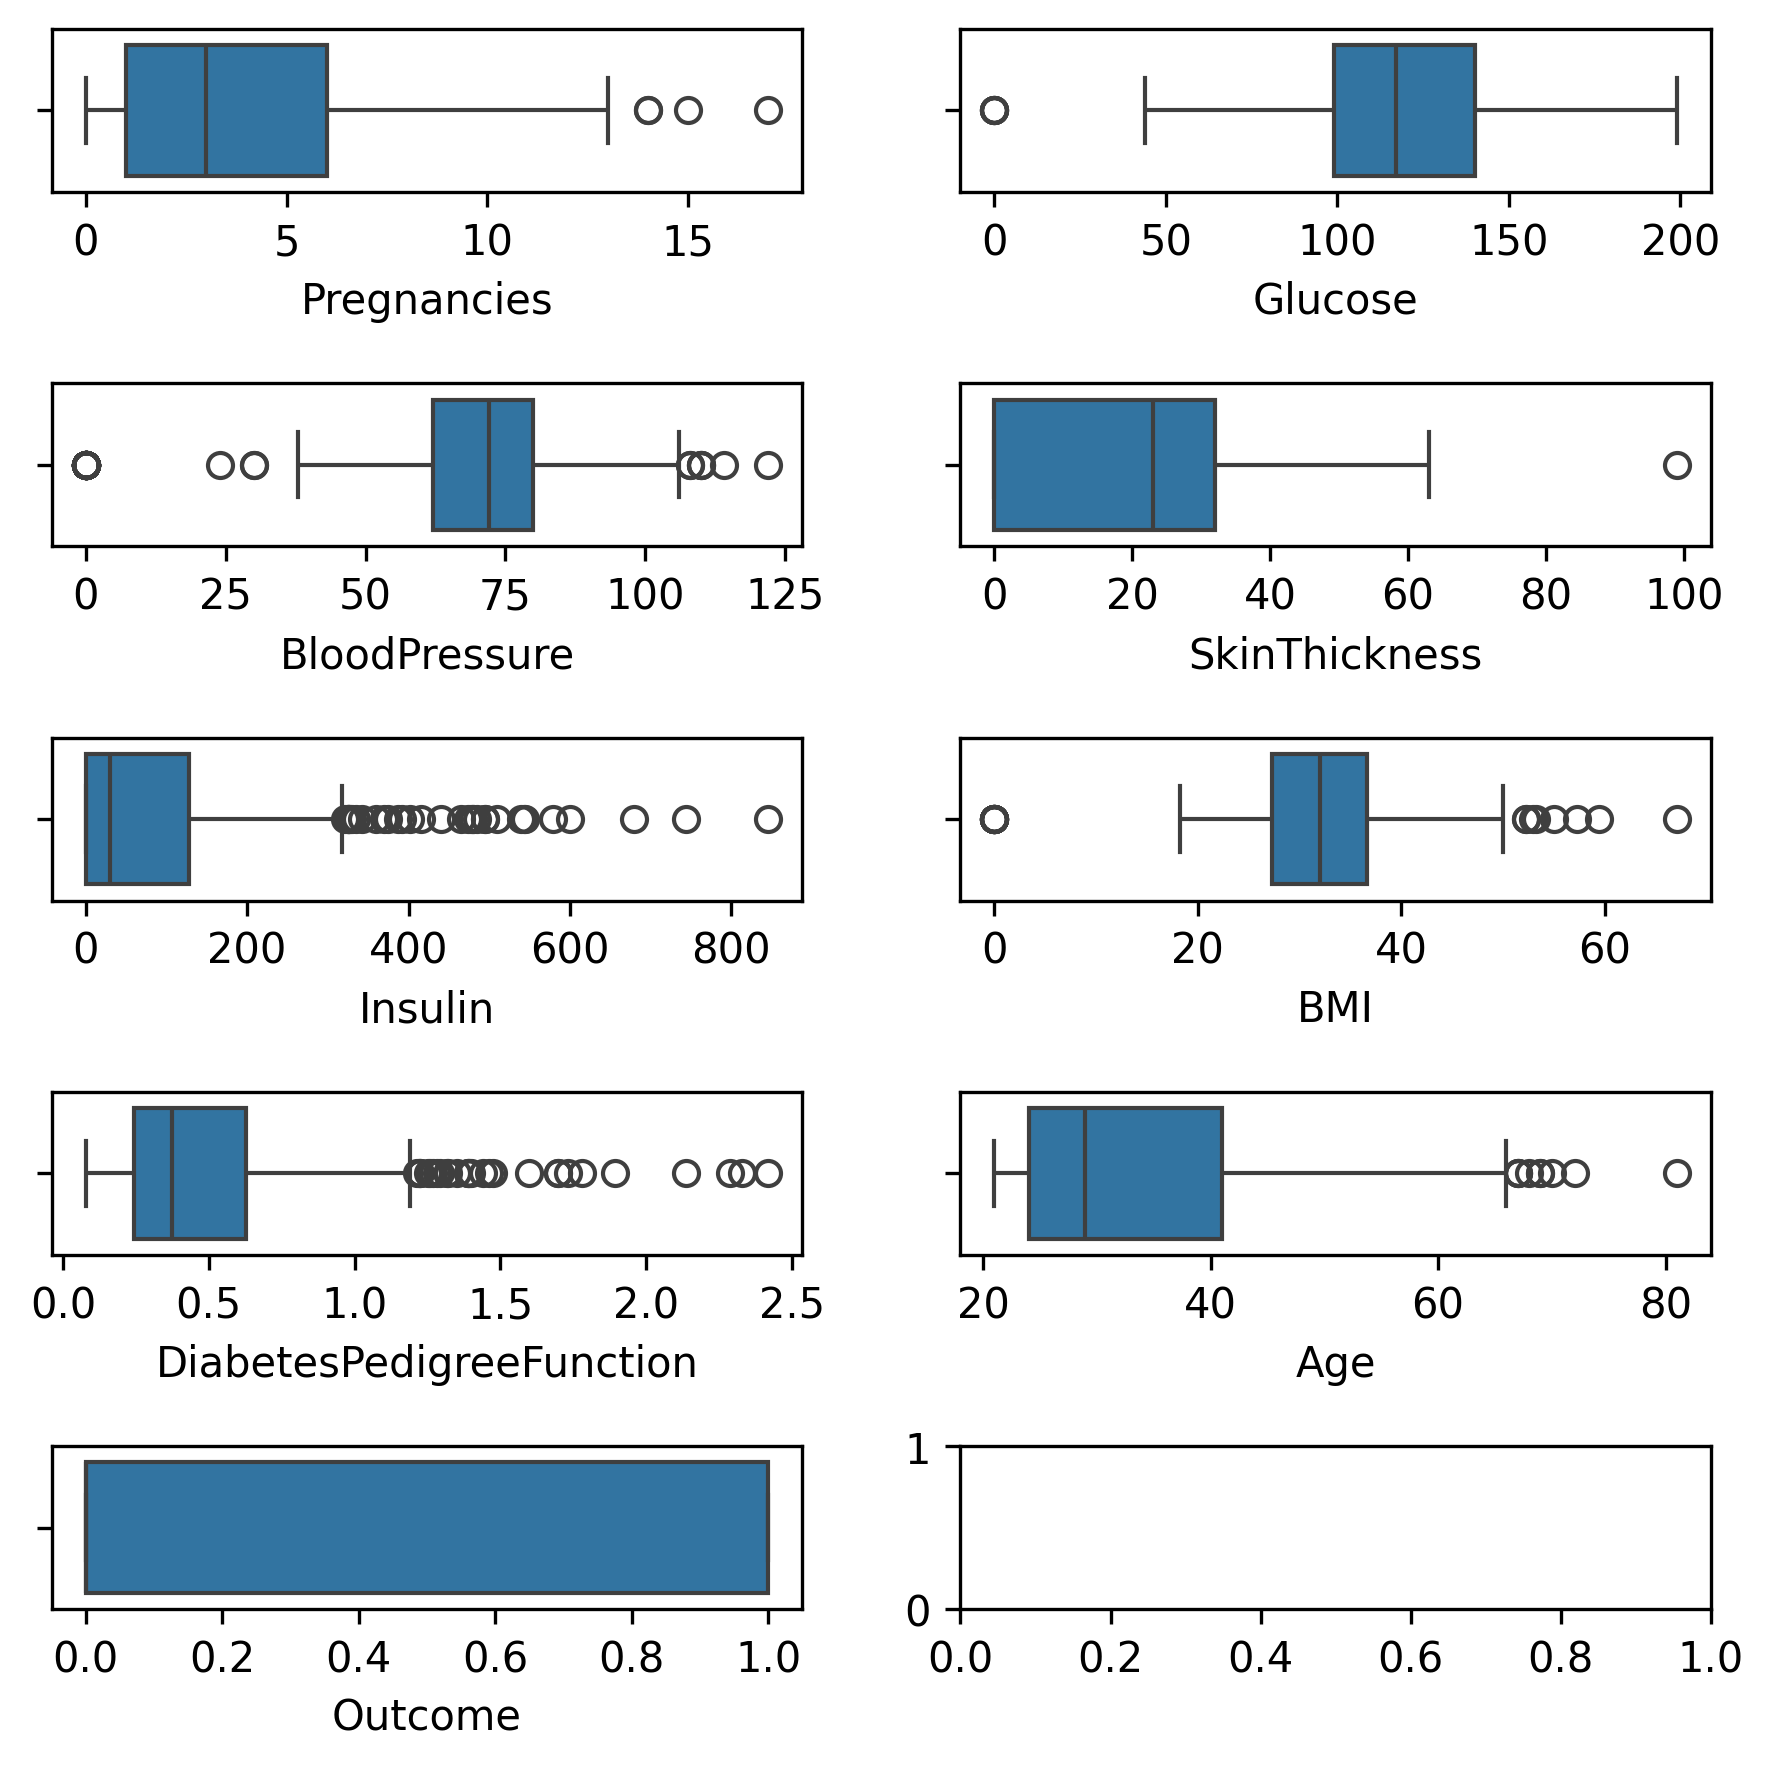

In [14]:
fig,ax = plt.subplots(nrows = 5,ncols = 2,figsize = (6,6),dpi = 300)

ax = ax.flatten()
index = 0

for k,v in df.items():
    sns.boxplot(data = df,x = k,ax=ax[index])
    index = index+1
plt.tight_layout()
plt.show()

In [8]:
#There are outliers in the columsn

In [15]:
#Ouliter Filter

df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [16]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

In [17]:
lower_bound

Pregnancies                  -6.500
Glucose                      37.125
BloodPressure                35.000
SkinThickness               -48.000
Insulin                    -190.875
BMI                          13.350
DiabetesPedigreeFunction     -0.330
Age                          -1.500
Outcome                      -1.500
dtype: float64

In [18]:
upper_bound

Pregnancies                  13.500
Glucose                     202.125
BloodPressure               107.000
SkinThickness                80.000
Insulin                     318.125
BMI                          50.550
DiabetesPedigreeFunction      1.200
Age                          66.500
Outcome                       2.500
dtype: float64

In [19]:
df = df[~((df<lower_bound) | (df > upper_bound)).any(axis=1)]

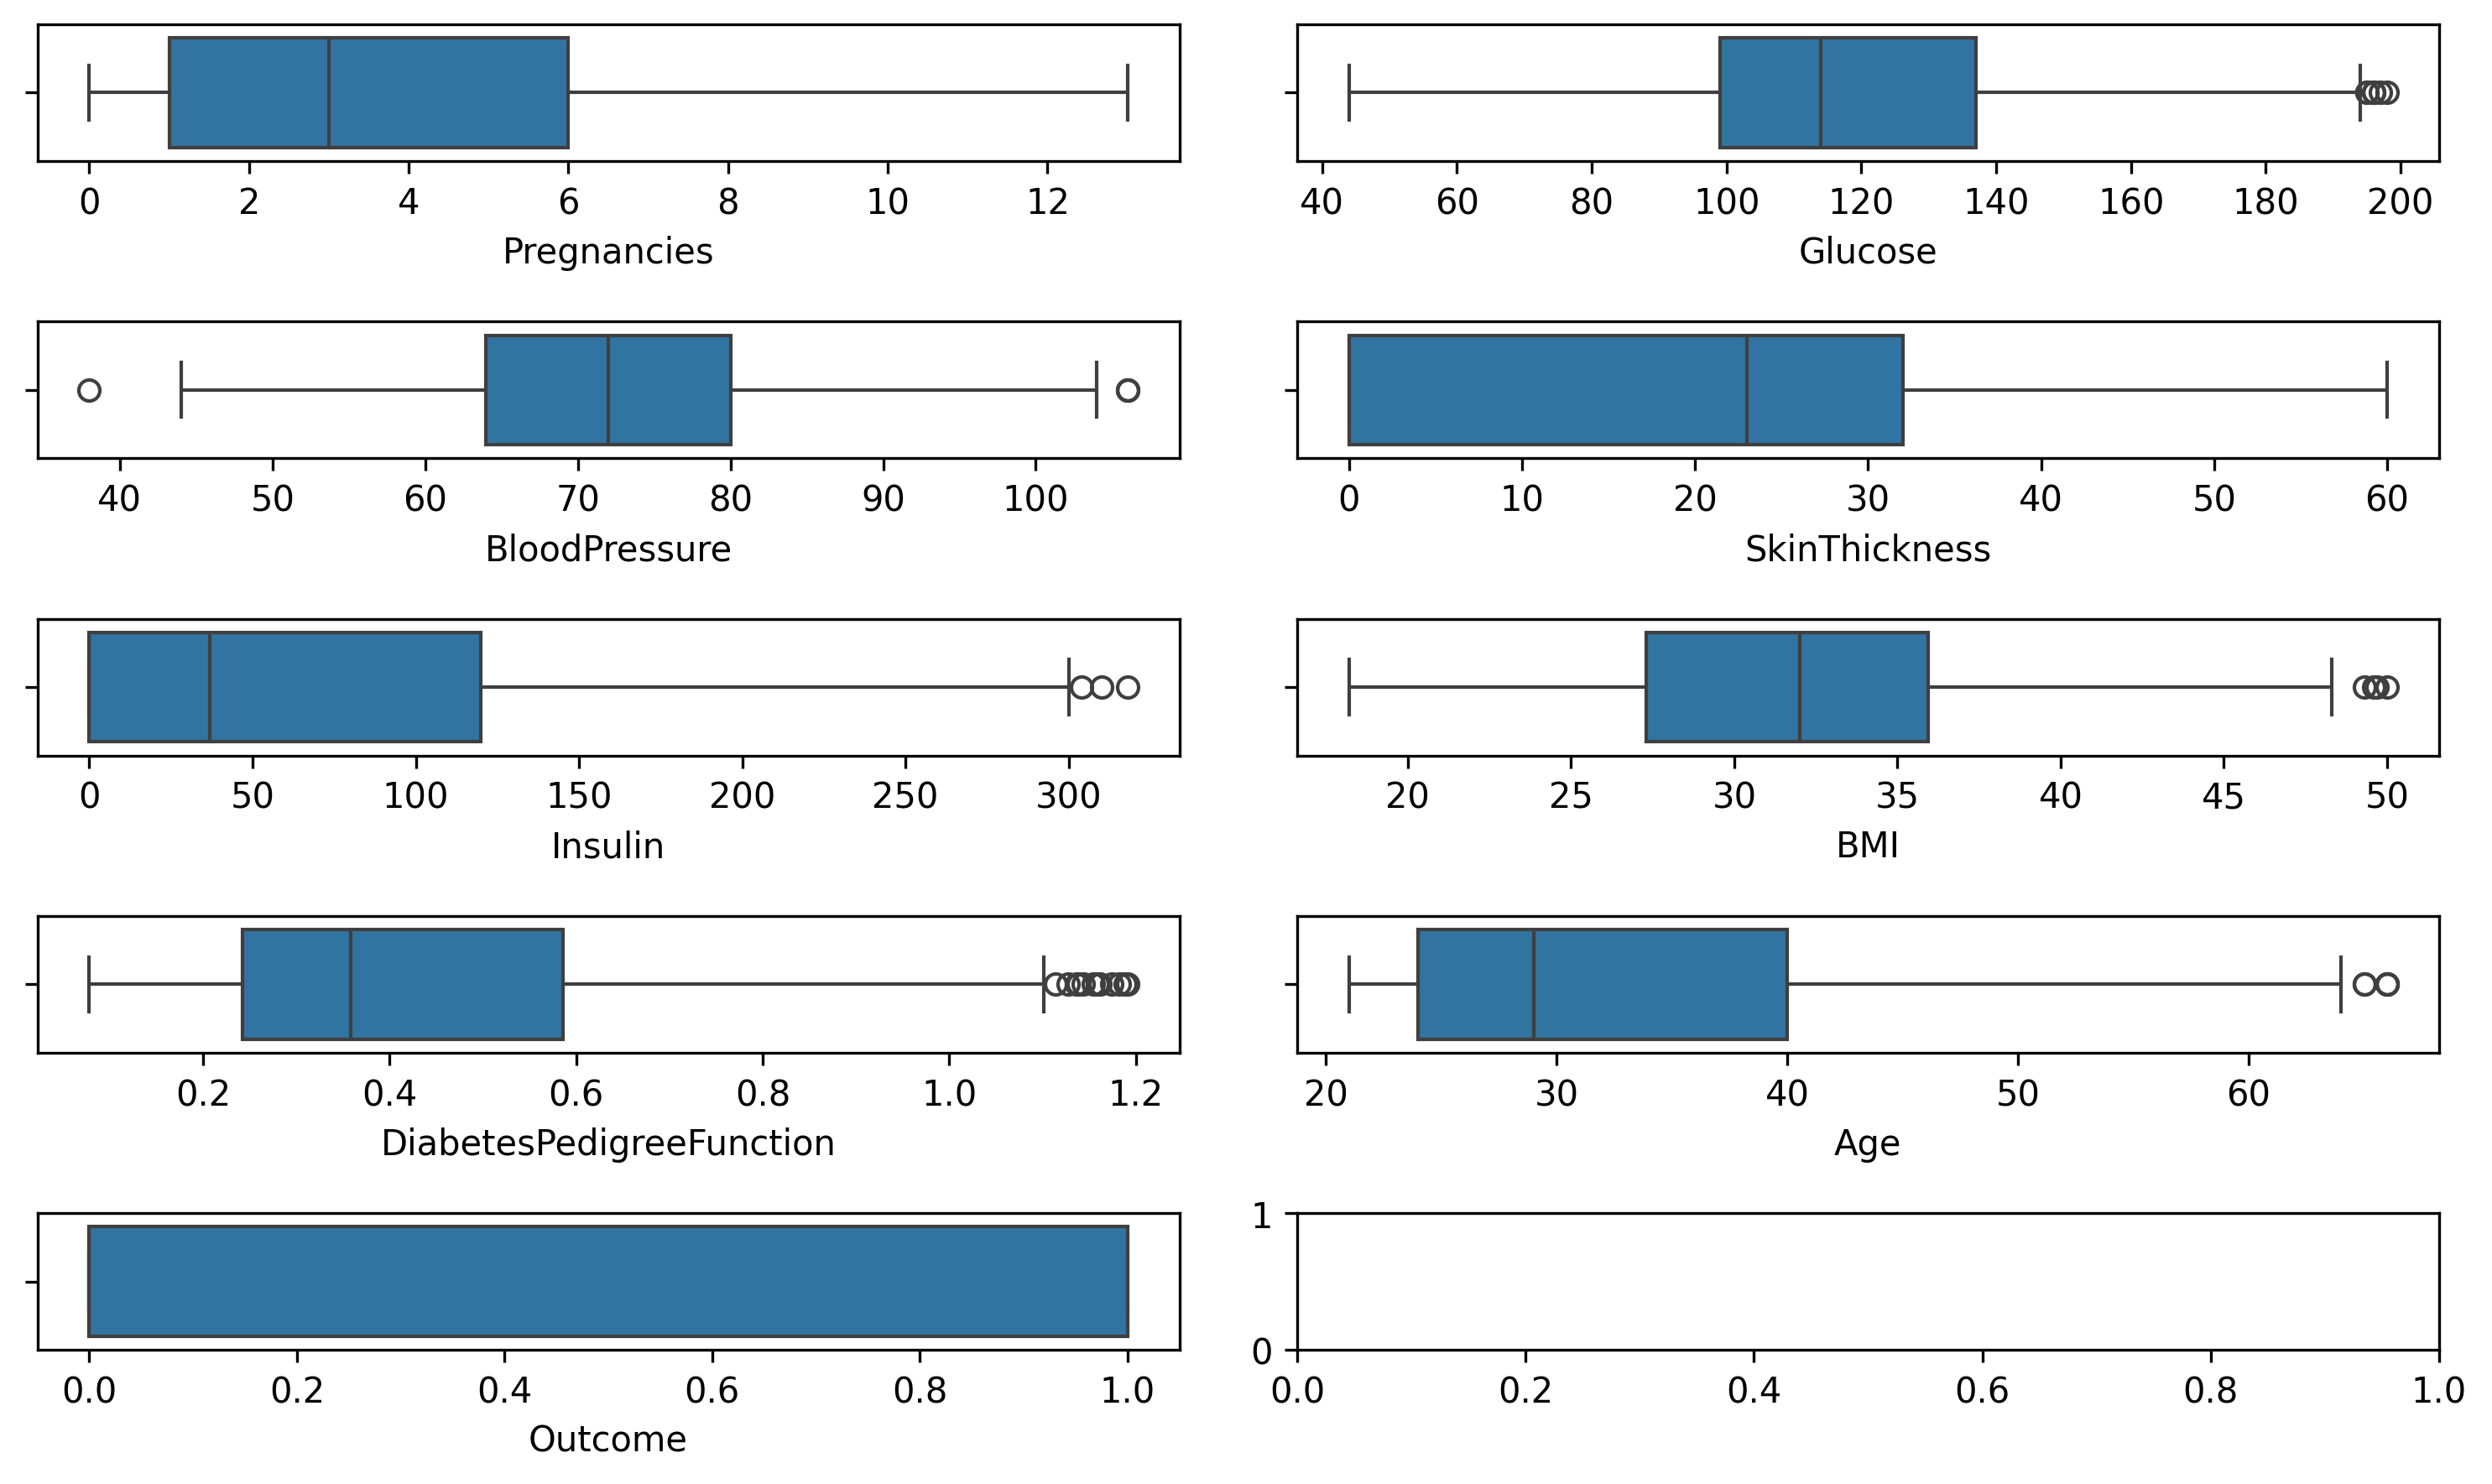

In [21]:
fig,ax = plt.subplots(nrows = 5,ncols = 2,figsize = (10,6),dpi = 300)

ax = ax.flatten()
index = 0

for k,v in df.items():
    sns.boxplot(data = df,x = k,ax=ax[index])
    index = index+1
plt.tight_layout()
plt.show()

In [22]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']
y.head()

0    1
1    0
2    1
3    0
5    0
Name: Outcome, dtype: int64

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns = X.columns,index = X.index)
X_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.461538,0.675325,0.500000,0.583333,0.000000,0.484277,0.493261,0.644444
1,0.076923,0.266234,0.411765,0.483333,0.000000,0.264151,0.245283,0.222222
2,0.615385,0.902597,0.382353,0.000000,0.000000,0.160377,0.533693,0.244444
3,0.076923,0.292208,0.411765,0.383333,0.295597,0.311321,0.079964,0.000000
5,0.384615,0.467532,0.529412,0.000000,0.000000,0.232704,0.110512,0.200000


In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3,random_state = 42)

In [26]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((447, 8), (192, 8), (447,), (192,))

In [27]:
k_values = np.arange(1,22,2)
k_values

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21])

In [28]:
train_score = []
test_score = []

In [29]:
for k in k_values:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train,y_train)
    score = model.score(X_train,y_train)
    train_score.append(score)
    score = model.score(X_test,y_test)
    test_score.append(score)

In [30]:
k_values

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21])

In [31]:
train_score

[1.0,
 0.854586129753915,
 0.814317673378076,
 0.8076062639821029,
 0.7941834451901566,
 0.7897091722595079,
 0.7762863534675615,
 0.7740492170022372,
 0.7762863534675615,
 0.7807606263982103,
 0.7785234899328859]

In [32]:
test_score

[0.7135416666666666,
 0.7447916666666666,
 0.7760416666666666,
 0.78125,
 0.7604166666666666,
 0.7708333333333334,
 0.7708333333333334,
 0.7604166666666666,
 0.7708333333333334,
 0.7708333333333334,
 0.7760416666666666]

<Axes: >

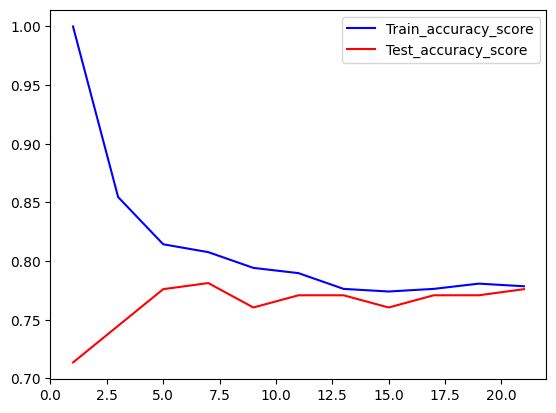

In [33]:
sns.lineplot(x = k_values,y = train_score,label = 'Train_accuracy_score',color = 'blue')
sns.lineplot(x = k_values,y = test_score,label = 'Test_accuracy_score',color = 'Red')

In [34]:
train_auc_score = []
test_auc_score = []
for k in k_values:
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train,y_train)
    y_prob = model.predict_proba(X_train)[:,1]
    auc_score = roc_auc_score(y_train,y_prob)
    train_auc_score.append(auc_score)
    y_prob = model.predict_proba(X_test)[:,1]
    auc_score = roc_auc_score(y_test,y_prob)
    test_auc_score.append(auc_score)

In [35]:
train_auc_score

[1.0,
 0.923173569101908,
 0.8774080967892043,
 0.8646230805025593,
 0.8559213587715216,
 0.8479060027919962,
 0.8336551884597486,
 0.8269543973941368,
 0.8284667287110283,
 0.8240344346207538,
 0.8277687296416939]

In [36]:
test_auc_score

[0.6507575757575758,
 0.763510101010101,
 0.7993055555555555,
 0.8011363636363638,
 0.8035984848484848,
 0.8263888888888888,
 0.8335227272727272,
 0.83364898989899,
 0.834280303030303,
 0.844570707070707,
 0.8448863636363636]

<Axes: >

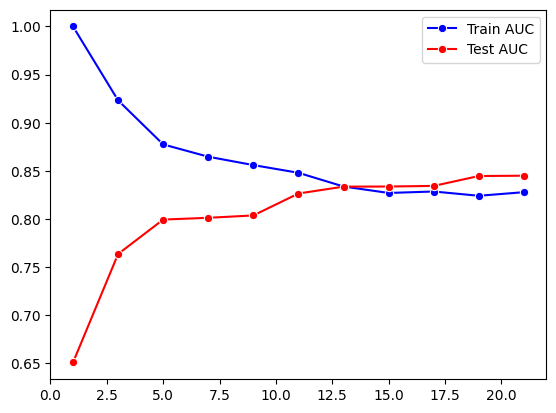

In [37]:
sns.lineplot(x = k_values,y = train_auc_score,label = 'Train AUC',color = 'blue',marker = 'o')
sns.lineplot(x = k_values,y = test_auc_score,label = 'Test AUC',color = 'red',marker = 'o')

In [38]:
#The best K Value = 15
best_K = 13

In [39]:
model = KNeighborsClassifier(n_neighbors = 13)


In [40]:
X_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.461538,0.675325,0.500000,0.583333,0.000000,0.484277,0.493261,0.644444
1,0.076923,0.266234,0.411765,0.483333,0.000000,0.264151,0.245283,0.222222
2,0.615385,0.902597,0.382353,0.000000,0.000000,0.160377,0.533693,0.244444
3,0.076923,0.292208,0.411765,0.383333,0.295597,0.311321,0.079964,0.000000
5,0.384615,0.467532,0.529412,0.000000,0.000000,0.232704,0.110512,0.200000


In [41]:
model.fit(X_scaled,y)
X_scaled['prob'] = model.predict_proba(X_scaled)[:,1]

In [42]:
X_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,prob
0,0.461538,0.675325,0.500000,0.583333,0.000000,0.484277,0.493261,0.644444,0.769231
1,0.076923,0.266234,0.411765,0.483333,0.000000,0.264151,0.245283,0.222222,0.000000
2,0.615385,0.902597,0.382353,0.000000,0.000000,0.160377,0.533693,0.244444,0.692308
3,0.076923,0.292208,0.411765,0.383333,0.295597,0.311321,0.079964,0.000000,0.000000
5,0.384615,0.467532,0.529412,0.000000,0.000000,0.232704,0.110512,0.200000,0.230769


In [62]:
t_values = np.arange(0,1.1,0.1)
t_values

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [63]:
threshold_df = pd.DataFrame(columns = ['Threshold','TP','TN','FP','FN','TPR','FPR'])
threshold_df

,Threshold,TP,TN,FP,FN,TPR,FPR


In [64]:
for threshold in t_values:
    y_pred = (X_scaled['prob'] > threshold).astype(int)
    cm = confusion_matrix(y,y_pred)
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    precision = TP/(TP+FP)
    recall = FP/(FP+FN)
    F1_Score = 2*precision*recall/(precision+recall)
    FPR = FP/(FP+TN)
    TPR = TP/(TP+FN)
    print(cm)
    threshold_df.loc[len(threshold_df)] = pd.Series({'Threshold':threshold,'TP':TP,'TN':TN,'FP':FP,'FN':FN,'TPR':TPR,'FPR':FPR})
auc_score = roc_auc_score(y,X_scaled['prob'])
auc = round(auc_score,2)
auc

[[101 338]
 [  0 200]]
[[185 254]
 [  5 195]]
[[257 182]
 [ 18 182]]
[[301 138]
 [ 33 167]]
[[371  68]
 [ 73 127]]
[[397  42]
 [ 97 103]]
[[417  22]
 [120  80]]
[[437   2]
 [176  24]]
[[438   1]
 [190  10]]
[[438   1]
 [199   1]]
[[439   0]
 [200   0]]


C:\Users\chall\AppData\Local\Temp\ipykernel_21784\958181776.py:8: RuntimeWarning: invalid value encountered in scalar divide
  precision = TP/(TP+FP)


0.85

In [65]:
threshold_df

,Threshold,TP,TN,FP,FN,TPR,FPR
0,0.0,200.0,101.0,338.0,0.0,1.000,0.769932
1,0.1,195.0,185.0,254.0,5.0,0.975,0.578588
2,0.2,182.0,257.0,182.0,18.0,0.910,0.414579
3,0.3,167.0,301.0,138.0,33.0,0.835,0.314351
4,0.4,127.0,371.0,68.0,73.0,0.635,0.154897
5,0.5,103.0,397.0,42.0,97.0,0.515,0.095672
6,0.6,80.0,417.0,22.0,120.0,0.400,0.050114
7,0.7,24.0,437.0,2.0,176.0,0.120,0.004556
8,0.8,10.0,438.0,1.0,190.0,0.050,0.002278
9,0.9,1.0,438.0,1.0,199.0,0.005,0.002278


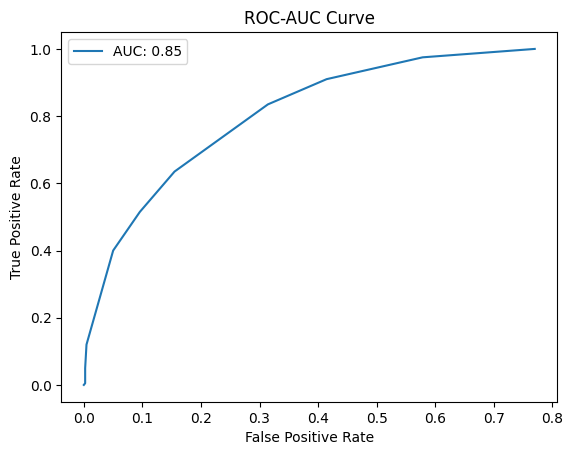

In [66]:
plt.plot(threshold_df['FPR'],threshold_df['TPR'],label = 'AUC: {}'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()

In [67]:
threshold_df['TPR-FPR'] = threshold_df['TPR'] - threshold_df['FPR']

In [68]:
max_tpr_fpr = threshold_df['TPR-FPR'].max()

In [69]:
best_threshold = threshold_df[threshold_df['TPR-FPR'] == max_tpr_fpr]['Threshold'].values[0]

In [70]:
y_pred_selected_threshold = (X_scaled['prob'] > best_threshold).astype('int')
y_pred_selected_threshold

0      1
1      0
2      1
3      0
5      0
      ..
763    1
764    0
765    0
766    1
767    0
Name: prob, Length: 639, dtype: int32

In [71]:
cm = confusion_matrix(y,y_pred_selected_threshold)

In [72]:
cm

array([[301, 138],
       [ 33, 167]], dtype=int64)

In [73]:
cm_df = pd.DataFrame(cm,columns = ['Predicted 0','Predicted 1'],index = ['Actual 0','Actual 1'])

In [74]:
cm_df

,Predicted 0,Predicted 1
Actual 0,301,138
Actual 1,33,167


In [75]:
TP = cm_df.iloc[1,1]
TN = cm_df.iloc[0,0]
FP = cm_df.iloc[0,1]
FN = cm_df.iloc[1,0]

precision = TP/(TP+FP)
recall = TP/(TP+FN)
accuracy = (TP+TN)/(TP+TN+FP+FN)
sensitivity = TN/(TN+FP)
f1_score = 2*precision*recall/(precision+recall)


In [133]:
print('accuracy:',accuracy)
print('precision:',precision)
print('recall:',recall)
print('sensitivity:',sensitivity)
print('f1_score:',f1_score)

accuracy: 0.7323943661971831
precision: 0.5475409836065573
recall: 0.835
sensitivity: 0.6856492027334852
f1_score: 0.6613861386138614


In [77]:
summary = pd.DataFrame(columns = ['Model','Accuracy','Precision','Recall','Misclassification','AUC'])
summary.loc[len(summary)] = pd.Series({'Model':'kNN Classification','Accuracy':accuracy,'Precision':precision,'Recall':recall,'AUC':auc,'Misclassification':1-accuracy})
summary

,Model,Accuracy,Precision,Recall,Misclassification,AUC
0,kNN Classification,0.732394,0.547541,0.835,0.267606,0.85


### Decision Tree Classifier

In [78]:
from sklearn.tree import DecisionTreeClassifier

dtr = DecisionTreeClassifier(criterion = 'gini')
model = dtr.fit(X_train,y_train)
y_pred_train = model.predict(X_train)

In [79]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train,y_pred_train)

1.0

In [80]:
y_pred_test = model.predict(X_test)
accuracy_score(y_test,y_pred_test)

0.703125

In [81]:
#As the accuracy score on the train dataset is much more than the test dataset, the model is overfitted

#We need to tune the hyperparameters

In [82]:
#We are going to use GridSearchCV for hyperparameter tuning

In [83]:
parameters = {'max_depth' : [1,3,5,7,9,11,13],
              'splitter' : ['random','best'],
             'min_samples_split':[2,5,10,15,20,25,30],
             'min_samples_leaf':[2,5,10,15],
             "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90],
             "max_features":["auto","log2","sqrt",None]}

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
tuning = GridSearchCV(model,param_grid = parameters,scoring = 'accuracy',cv = 3,verbose=0)

In [87]:
tuning.fit(X_scaled,y)

C:\Users\chall\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
11760 fits failed out of a total of 47040.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11760 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\chall\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\chall\anaconda3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\chall\anaconda3\Lib\site-packages\sklearn\base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\chall\anaconda3\Lib\site-

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [2, 5, 10, 15],
                         'min_samples_split': [2, 5, 10, 15, 20, 25, 30],
                         'splitter': ['random', 'best']},
             scoring='accuracy')

In [88]:
tuning.best_params_

{'max_depth': 13,
 'max_features': None,
 'max_leaf_nodes': 10,
 'min_samples_leaf': 10,
 'min_samples_split': 15,
 'splitter': 'random'}

In [89]:
dtr = DecisionTreeClassifier(criterion = 'gini',splitter = 'random',max_depth = 13,max_features = None,max_leaf_nodes = 10,min_samples_leaf = 10,min_samples_split = 15)

In [90]:
model = dtr.fit(X_train,y_train)
y_pred_train_bp = model.predict(X_train)
model.score(X_train,y_train)

0.7628635346756152

In [91]:
model.score(X_test,y_test)

0.7447916666666666

In [92]:
#So the scores are comaprable
X_scaled = X_scaled.drop('prob',axis=1)

In [93]:
#Selecting the best threshold
model = dtr.fit(X,y)

In [94]:
X_scaled.columns.to_list()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

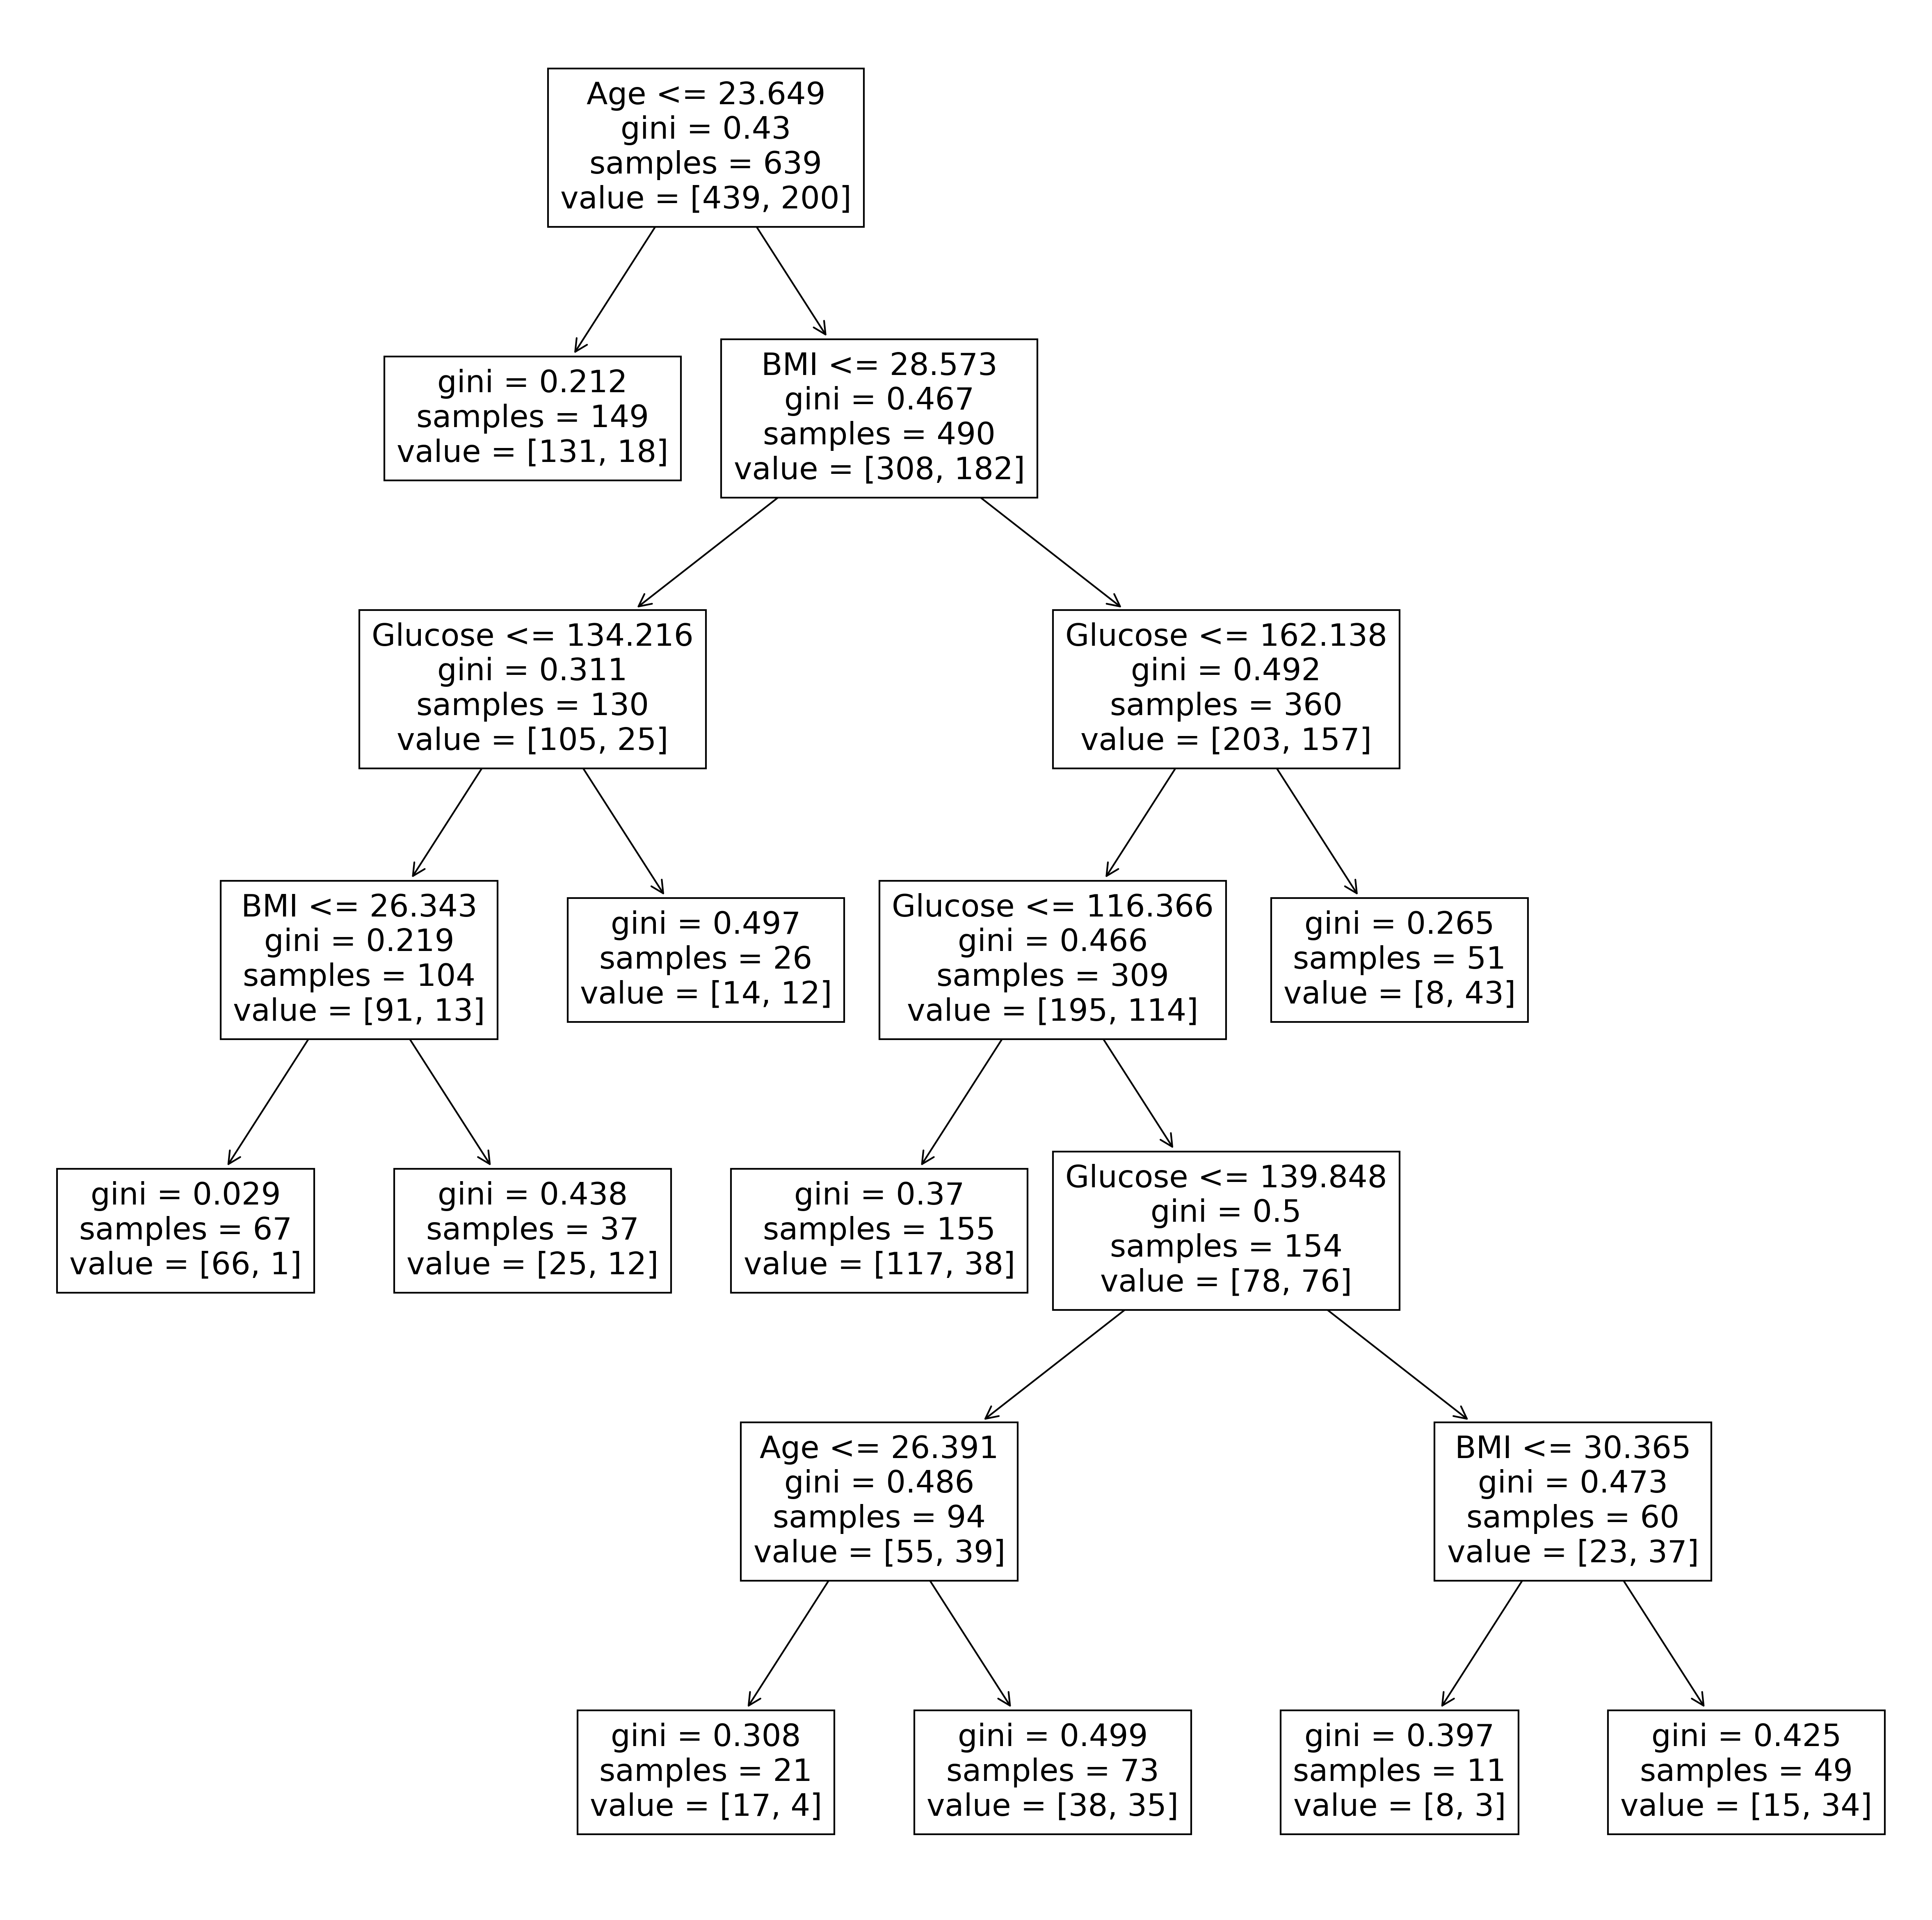

In [95]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
plt.figure(figsize = (20,20),dpi=300)
plot_tree(model,feature_names = X.columns.to_list())
plt.show()

In [96]:
X['prob'] = model.predict_proba(X)[:,1]

In [97]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,prob
0,6,148,72,35,0,33.6,0.627,50,0.693878
1,1,85,66,29,0,26.6,0.351,31,0.324324
2,8,183,64,0,0,23.3,0.672,32,0.461538
3,1,89,66,23,94,28.1,0.167,21,0.120805
5,5,116,74,0,0,25.6,0.201,30,0.014925


In [98]:
# Initialize empty dataframe to store metrics
df_ROC = pd.DataFrame(columns=['Threshold', 'TP', 'TN', 'FP', 'FN', 'TPR', 'FPR'])

    Threshold     TP     TN     FP     FN    TPR       FPR
0         0.0  200.0    0.0  439.0    0.0  1.000  1.000000
1         0.1  199.0   66.0  373.0    1.0  0.995  0.849658
2         0.2  177.0  214.0  225.0   23.0  0.885  0.512528
3         0.3  136.0  339.0  100.0   64.0  0.680  0.227790
4         0.4  124.0  364.0   75.0   76.0  0.620  0.170843
5         0.5   77.0  416.0   23.0  123.0  0.385  0.052392
6         0.6   77.0  416.0   23.0  123.0  0.385  0.052392
7         0.7   43.0  431.0    8.0  157.0  0.215  0.018223
8         0.8   43.0  431.0    8.0  157.0  0.215  0.018223
9         0.9    0.0  439.0    0.0  200.0  0.000  0.000000
10        1.0    0.0  439.0    0.0  200.0  0.000  0.000000
AUC: 0.800125284738041


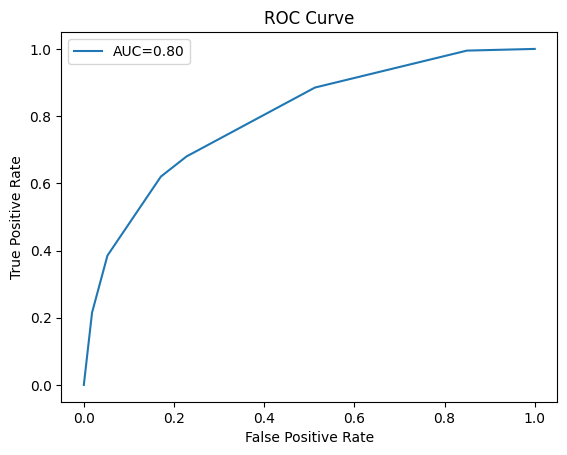

In [99]:
# Loop through different thresholds and calculate metrics
for threshold in np.arange(0, 1.1, 0.1):
    y_pred = (X['prob'] > threshold).astype(int)
    cm = confusion_matrix(y, y_pred)
    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TPR = TP / (TP + FN)
    FPR = FP / (FP + TN)
    df_ROC.loc[len(df_ROC)] = pd.Series({'Threshold': threshold, 
                                         'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN, 
                                         'TPR': TPR, 'FPR': FPR})

# Compute AUC
auc = roc_auc_score(y, X['prob'])

# Print ROC curve and AUC
print(df_ROC)
print('AUC:', auc)

# Plot ROC curve from df_ROC
plt.plot(df_ROC['FPR'], df_ROC['TPR'], label=f'AUC={auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [100]:
df_ROC['TPR-FPR'] = df_ROC['TPR'] - df_ROC['FPR']

In [101]:
max_TPR_FPR = df_ROC['TPR-FPR'].max()

In [102]:
best_threshold  = df_ROC[df_ROC['TPR-FPR'] == max_TPR_FPR]['Threshold'].values[0]

In [103]:
#For the best Threshold

y_pred_bt = (X['prob'] > best_threshold).astype('int')
cm = confusion_matrix(y,y_pred_bt)

In [104]:
cm = pd.DataFrame(cm,columns = ['Predicted 0','Predicted 1'],index = ['Actual 0','Actual 1'])
cm

,Predicted 0,Predicted 1
Actual 0,339,100
Actual 1,64,136


In [105]:
TP = cm.iloc[1,1]
TN = cm.iloc[0,0]
FP = cm.iloc[0,1]
FN = cm.iloc[1,0]

precision = TP/(TP+FP)
sensitivity = TP/(TP+FN)
accuracy_score = (TP+TN)/(TP+TN+FP+FN)
misclassification_rate = 1-accuracy_score
specificity = TN/(TN+FP)
f1_score = 2*precision*sensitivity/(precision+sensitivity)

In [106]:
print('Accuracy:', accuracy)
print('Misclassification Rate:', misclassification_rate)
print('Sensitivity (Recall):', sensitivity)
print('Specificity:', specificity)
print('Precision:', precision)
print('F1 Score:', f1_score)

Accuracy: 0.7323943661971831
Misclassification Rate: 0.25665101721439754
Sensitivity (Recall): 0.68
Specificity: 0.7722095671981777
Precision: 0.576271186440678
F1 Score: 0.6238532110091743


In [108]:
summary.loc[len(summary)] = pd.Series({'Model':'Decision Tree Classifier','Accuracy':accuracy,'Precision':precision,'Misclassification':1-accuracy,'AUC':auc,'Recall':sensitivity})


,Model,Accuracy,Precision,Recall,Misclassification,AUC
0,kNN Classification,0.732394,0.547541,0.835,0.267606,0.85
1,Decision Tree Classifier,0.732394,0.576271,NaN,0.267606,0.800125
2,Decision Tree Classifier,0.732394,0.576271,0.68,0.267606,0.800125


In [115]:

summary

,Model,Accuracy,Precision,Recall,Misclassification,AUC
0,kNN Classification,0.732394,0.547541,0.835,0.267606,0.85
2,Decision Tree Classifier,0.732394,0.576271,0.68,0.267606,0.800125


## kNN performed better on the diabetes